In [20]:
# Mushroom classification with Artifical Neural Network

#%%
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
import matplotlib.pyplot as plt
import seaborn as sns

!conda install -c conda-forge ann_visualizer
# Load the data

filename = 'mushrooms_data.txt'

h_names=['class', 'cap-shape', 'Cap-surface','cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size','gill-color', 'stalk-shape', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
data = pd.read_csv(filename,names = h_names)

# Split the data (features/label)
features = data.drop('odor',axis=1)
label = list(data['odor'])

# Get all columns in features set
features_cols = features.columns

# Onehot encode all features columns
from sklearn.preprocessing import LabelEncoder
def onehot_all_cols(cols):
    encoder = LabelEncoder()
    for col in cols:
        features[col] = encoder.fit_transform(features[col])

# Encode labels
def onehot_labels(label):
    return pd.get_dummies(label)

onehot_all_cols(features_cols)
label = onehot_labels(label)

# Build the model
from keras.models import Model
from keras.layers import Dense, Input

# Define input shape
inputs = Input(shape=(21,))

# Hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(9, activation='softmax')(x)

model = Model(inputs, predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

# Fit the model
model.fit(features, label, batch_size=64, validation_split=0.2, epochs=50)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                1408      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 9)                 297       
Total params: 7,945
Trainable params: 7,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
82/82 [==============================] - 0s 4ms/step - loss: 1.0521 - categorical_accuracy: 0.6682 - val_l

82/82 [==============================] - 0s 2ms/step - loss: 0.1149 - categorical_accuracy: 0.9188 - val_loss: 1.0272 - val_categorical_accuracy: 0.6815
Epoch 45/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1142 - categorical_accuracy: 0.9169 - val_loss: 1.1566 - val_categorical_accuracy: 0.6831
Epoch 46/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1143 - categorical_accuracy: 0.9209 - val_loss: 0.9603 - val_categorical_accuracy: 0.6792
Epoch 47/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1145 - categorical_accuracy: 0.9204 - val_loss: 1.0931 - val_categorical_accuracy: 0.6746
Epoch 48/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1142 - categorical_accuracy: 0.9159 - val_loss: 0.8377 - val_categorical_accuracy: 0.6846
Epoch 49/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1148 - categorical_accuracy: 0.9192 - val_loss: 1.1571 - val_categorical_accuracy: 0.6808
Epoch 50/50
82/82 [===

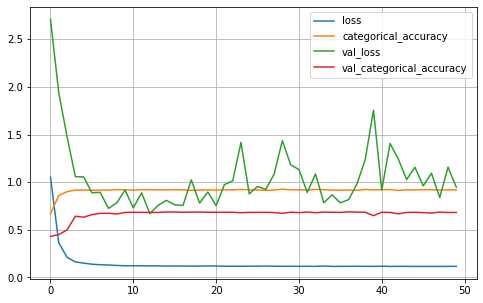

In [21]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()



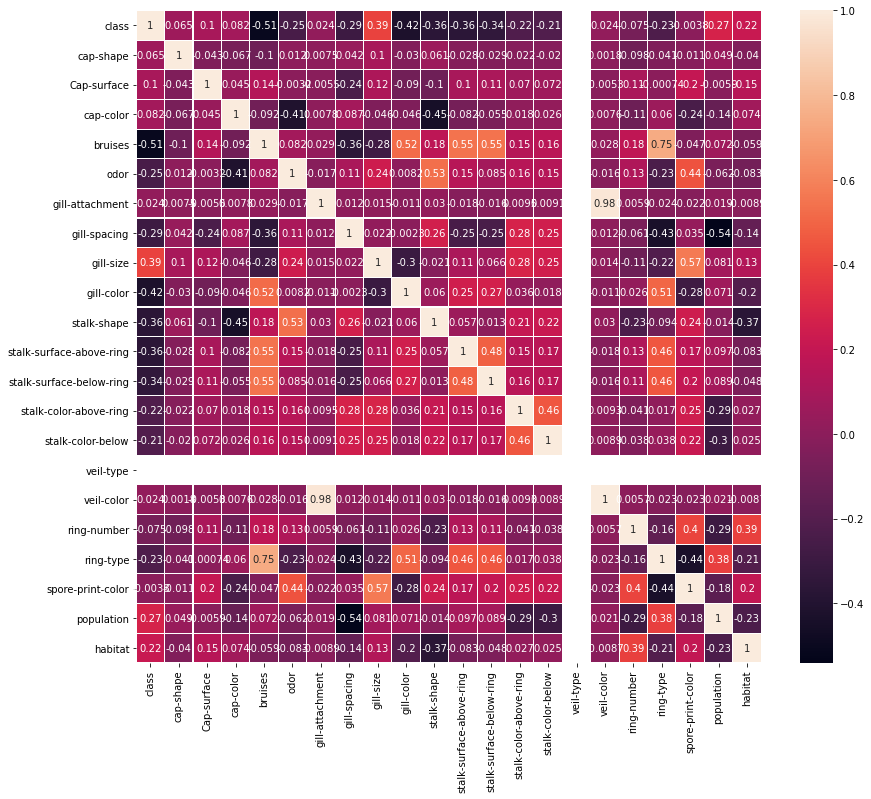

In [22]:

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
    
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);

In [38]:
#here also we get better score when we remove less correlation data.

X = data.drop(['odor','class','cap-color','ring-type','veil-color','population'],axis=1)
y = data['odor']
features_cols = X.columns
inputs = Input(shape=(16,))

# Hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(9, activation='softmax')(x)

model = Model(inputs, predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

# Fit the model
model.fit(X, label, batch_size=64, validation_split=0.2, epochs=50)

Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 16)]              0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_87 (Dense)             (None, 9)                 297       
Total params: 7,625
Trainable params: 7,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
82/82 [==============================] - 0s 4ms/step - loss: 1.3808 - categorical_accuracy: 0.5695 - val_l

82/82 [==============================] - 0s 2ms/step - loss: 0.1160 - categorical_accuracy: 0.9188 - val_loss: 0.6112 - val_categorical_accuracy: 0.6892
Epoch 45/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1163 - categorical_accuracy: 0.9198 - val_loss: 0.6580 - val_categorical_accuracy: 0.6838
Epoch 46/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1159 - categorical_accuracy: 0.9200 - val_loss: 0.6746 - val_categorical_accuracy: 0.6885
Epoch 47/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1162 - categorical_accuracy: 0.9229 - val_loss: 0.6378 - val_categorical_accuracy: 0.6862
Epoch 48/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1163 - categorical_accuracy: 0.9150 - val_loss: 0.6601 - val_categorical_accuracy: 0.6869
Epoch 49/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1165 - categorical_accuracy: 0.9163 - val_loss: 0.6664 - val_categorical_accuracy: 0.6877
Epoch 50/50
82/82 [===